# AutoData workspace

In [1]:
import autodata as ad
%load_ext autoreload
%autoreload 2

/usr/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Read data

In [2]:
input_file = 'data/adult.csv' #'data/wine.csv'
data = ad.read_csv(input_file, sep=',') #';')
data.set_class('income') #('quality')
data.train_test_split()

In [3]:
data.get_data('X_header')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [4]:
data.get_data('categorical_header')

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Processings

In [5]:
#data = data.imputation('most')
data = data.encoding('label') #, key='y')
#data = data.normalization('min-max')

### Visualization

y set plot


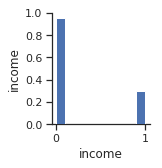

In [6]:
data.plot('y')

In [7]:
data.pca()

Explained variance ratio of the 15 components: 
 [9.99981900e-01 9.27279951e-06 2.96791613e-06 2.34952961e-06
 1.82049923e-06 9.56309976e-07 2.85128017e-07 2.53919882e-07
 7.90831501e-08 3.85594516e-08 3.10567174e-08 3.01059239e-08
 1.08450633e-08 2.32311377e-09 1.89795159e-09]


(PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 array([[ 5.61204578e+03, -7.93298860e+00, -1.19510518e+01, ...,
          1.54604077e+00,  4.77935942e-01, -2.38757439e-01],
        [-9.50495616e+03, -6.28575145e+00,  1.07036009e+00, ...,
         -1.59189442e-01, -8.85071461e-02, -2.23208756e-01],
        [ 1.16230452e+04, -7.22438414e+00, -8.13552624e+00, ...,
         -2.39507844e-01,  3.88676127e-01,  5.19069234e-01],
        ...,
        [-3.40095873e+03, -4.76718891e+00,  1.77444758e+01, ...,
         -6.31449828e-01, -1.15740214e-01,  3.77306534e-02],
        [ 3.09604649e+03, -9.70757786e+00, -2.03749447e+01, ...,
         -3.89706065e-01,  5.61109786e-01, -2.79790753e-01],
        [ 9.60403967e+03,  1.06137506e+02,  1.21212137e+00, ...,
         -5.05509910e-01,  1.41176428e-01,  3.69240016e-01]]))

In [8]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,21.643585,3.870439,13716.956185,10.288420,9.078089,2.618750,6.577700,1.443287,3.668052,0.668482,6.681504,2.234122,39.396728,36.749355,0.239282
std,13.710510,1.464234,7945.509369,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,24.045927,10.894011,12.295271,7.775343,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,6995.250000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000,0.000000
50%,20.000000,4.000000,13522.500000,11.000000,9.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000,0.000000
75%,31.000000,4.000000,20243.750000,12.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000,0.000000
max,73.000000,8.000000,28522.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,122.000000,98.000000,95.000000,41.000000,1.000000


### Benchmark

In [9]:
data.score()

0.8490411519825292